In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
titanic = pd.read_csv('../resources/train.csv')
#show first row
print(titanic.iloc[0])

PassengerId                          1
Survived                             0
Pclass                               3
Name           Braund, Mr. Owen Harris
Sex                               male
Age                                 22
SibSp                                1
Parch                                0
Ticket                       A/5 21171
Fare                              7.25
Cabin                              NaN
Embarked                             S
Name: 0, dtype: object


In [4]:
'''
clean data frame out of non numerical columns and rows with empty fields
'''

drop_cols = ['PassengerId', 'Name', 'Ticket','Cabin']
print(titanic.columns.tolist())
titanic.drop(labels=drop_cols,axis=1,inplace=True)
print(titanic.columns.tolist())
#drop rows that contain empty fields
titanic.dropna(inplace=True)
print(titanic.iloc[0])

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
Survived       0
Pclass         3
Sex         male
Age           22
SibSp          1
Parch          0
Fare        7.25
Embarked       S
Name: 0, dtype: object


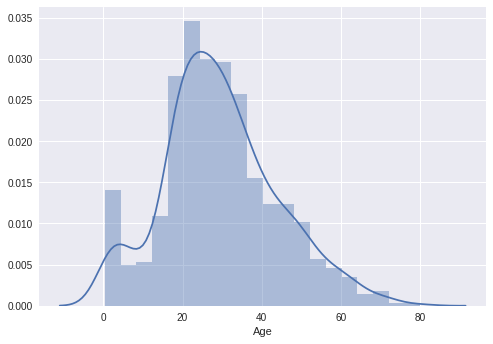

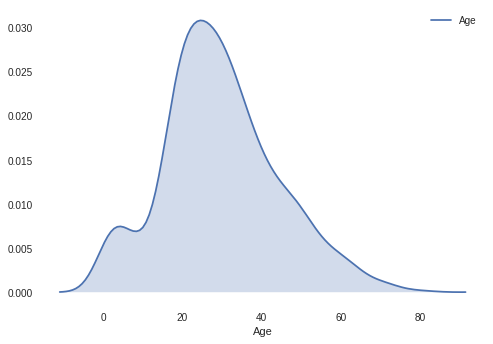

In [5]:
sns.distplot(titanic["Age"])
plt.show()

#we have to set style for seaborn before generating the plot
sns.set_style('white')
sns.kdeplot(titanic['Age'], shade=True)
#desipine will set spines to unvisible
#top and rigth is set to True as default
sns.despine(left=True,bottom=True)
plt.xlabel('Age')
plt.show()

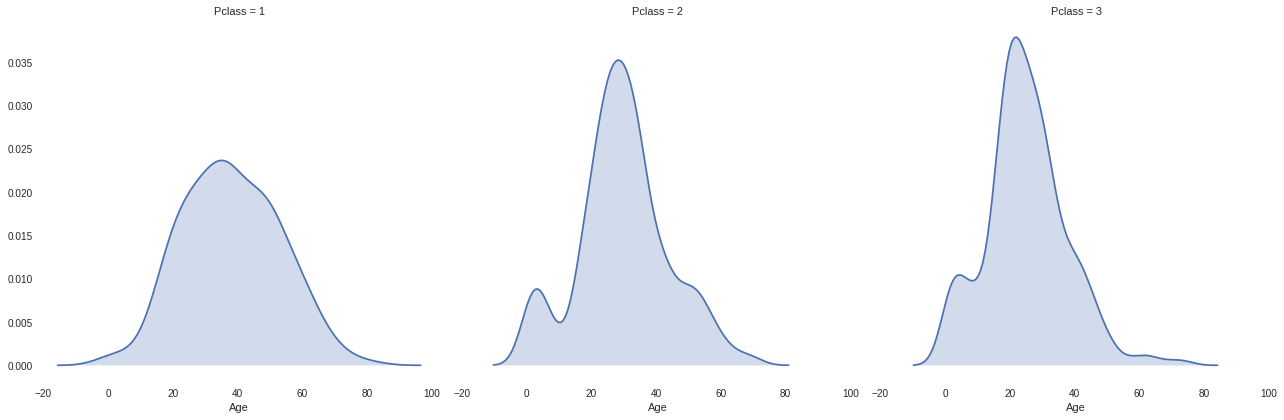

In [6]:
'''
let's subset the age column by those that survived and ones that didn't and plot both sets on kdeplot
'''

#size param is height in inches for grid
g = sns.FacetGrid(data=titanic, col='Pclass', size=6)
g.map(sns.kdeplot,'Age',shade=True)

sns.despine(left=True, bottom=True)
plt.show()

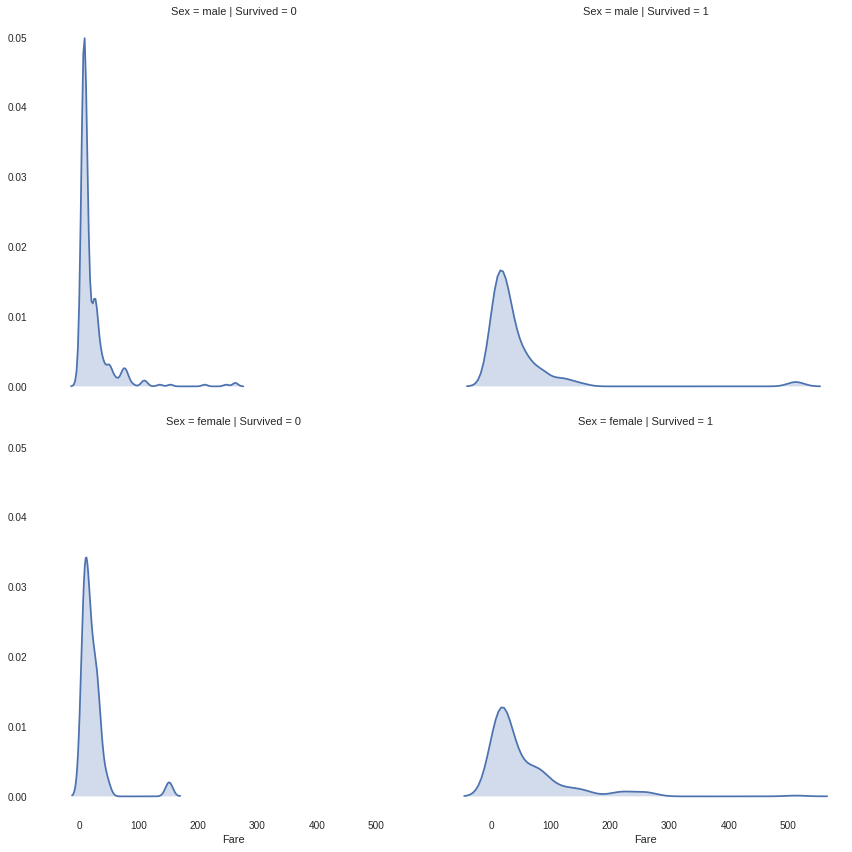

In [7]:
'''
let's now make subsets based on multiple conditions(2)
'''

g = sns.FacetGrid(titanic, col='Survived', row='Sex', size=6)
g.map(sns.kdeplot, 'Fare', shade=True)

sns.despine(left=True, bottom=True)
plt.show()

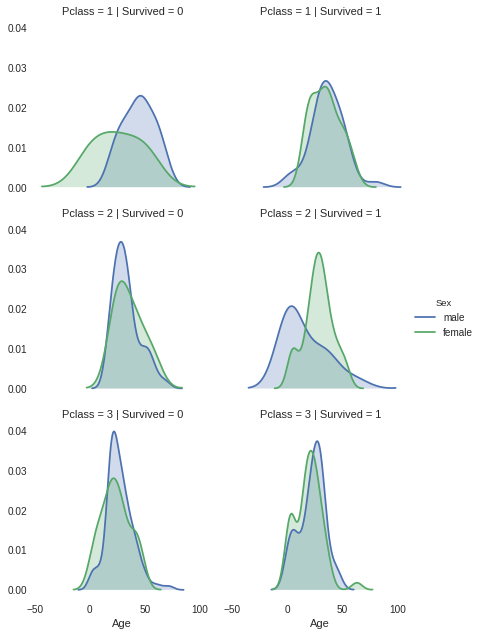

In [8]:
'''
 plot subsets using three conditions
'''

g = sns.FacetGrid(titanic, col='Survived', row='Pclass', hue='Sex', size=3)
g.map(sns.kdeplot, 'Age', shade=True)
g.add_legend()

sns.despine(left=True,bottom=True)
plt.show()

In [9]:
print(titanic['Sex'].value_counts())

male      453
female    259
Name: Sex, dtype: int64


In [11]:
print(titanic.pivot_table(index='Survived', columns='Sex'))

                Age                  Fare                Parch            \
Sex          female       male     female       male    female      male   
Survived                                                                   
0         25.046875  31.618056  22.771877  22.999871  1.078125  0.238889   
1         28.630769  27.276022  55.393334  43.793865  0.594872  0.397849   

            Pclass               SibSp            
Sex         female      male    female      male  
Survived                                          
0         2.812500  2.427778  0.968750  0.447222  
1         1.830769  1.978495  0.538462  0.408602  
